# TABLE OF CONTENTS
### 01. Importing Libraries
### 02. Importing data
### 03. Tasks
### 04. Exporting items

# 01. Importing libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/4-9-merge-of-customer-and-ords-prods/__results__.html
/kaggle/input/4-9-merge-of-customer-and-ords-prods/__notebook__.ipynb
/kaggle/input/4-9-merge-of-customer-and-ords-prods/orders_products_all.pkl
/kaggle/input/4-9-merge-of-customer-and-ords-prods/__output__.json
/kaggle/input/4-9-merge-of-customer-and-ords-prods/custom.css


# 02. Importing Data

In [2]:
# importing ords_prods_all
ords_prods_all = pd.read_pickle('/kaggle/input/4-9-merge-of-customer-and-ords-prods/orders_products_all.pkl')

In [3]:
ords_prods_all.head()

,order_id,user_id,order_sequence_per_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,frequent_customer,first_name,last_name,gender,us_state,age,date_joined,num_of_dependants,marital_status,yearly_income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423


In [4]:
# correcting typo on column name
ords_prods_all.rename(columns = {'num_of_dependants' : 'num_of_dependents'}, inplace = True)

In [5]:
ords_prods_all.head()

,order_id,user_id,order_sequence_per_user,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,frequent_customer,first_name,last_name,gender,us_state,age,date_joined,num_of_dependents,marital_status,yearly_income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423


In [6]:
ords_prods_all.shape

(32404859, 32)

In [7]:
ords_prods_all.columns

Index(['order_id', 'user_id', 'order_sequence_per_user', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'busiest_days', 'busiest_periods_of_day', 'max_order', 'loyalty_flag',
       'average_spending', 'type_of_spender', 'median_days_prior_orders',
       'frequent_customer', 'first_name', 'last_name', 'gender', 'us_state',
       'age', 'date_joined', 'num_of_dependents', 'marital_status',
       'yearly_income'],
      dtype='object')

# 03. Tasks

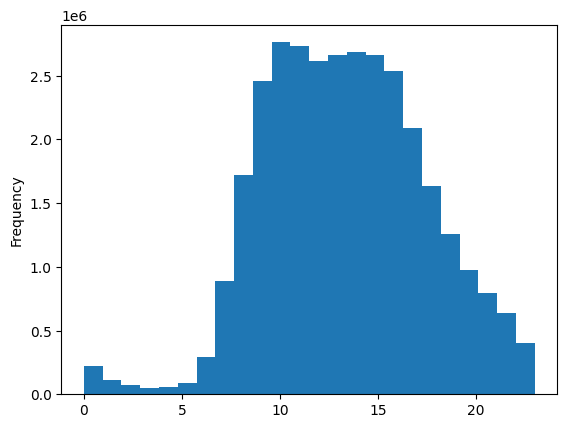

In [8]:
# step 3 - creating histogram of the activity thoughout the day
hist = ords_prods_all['order_hour_of_day'].plot.hist(bins = 24)

### During the night (between 0h-5h) there is minimal activity. It peaks up around 7am, The peak activity is between 10h-15h and the it is starting to slowly slow down, with a deep peak around 18h and on.

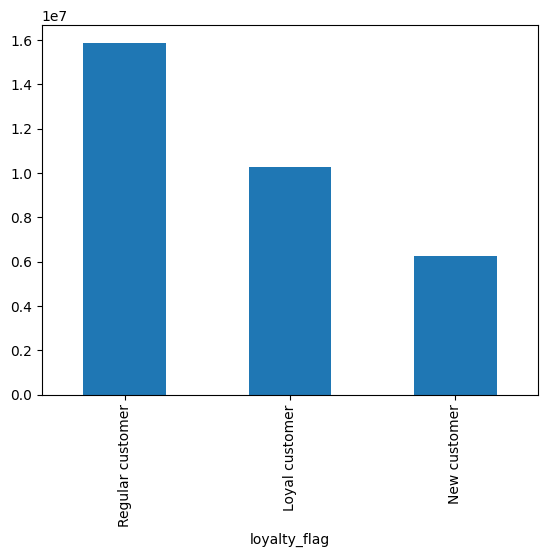

In [9]:
# step 4 - creating bar chart for the loyalty flag
bar_loyalty = ords_prods_all['loyalty_flag'].value_counts().plot.bar()

In [10]:
# step 5 - creating sample for the line chart
# creating list with random number
np.random.seed(4)
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [11]:
# Store 70% of the dataframe data
big = ords_prods_all[dev]

In [12]:
# Store 30% of the dataframe data
small = ords_prods_all[~dev]

In [13]:
# checking the sampling - part I - total lines in the dataframe
len(ords_prods_all)

32404859

In [14]:
# checking the sampling - part II - sum of lines in both sample set
len(big) + len(small)

32404859

In [15]:
# creating a new dataframe only with the columns I need
small_hour_prices = small[['order_hour_of_day','prices']]

In [16]:
#check output
small_hour_prices.head()

,order_hour_of_day,prices
0,8,9.0
2,8,4.4
3,8,4.7
6,7,3.0
10,7,4.0


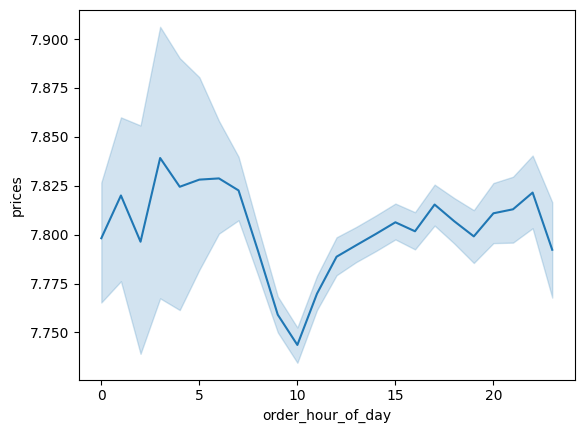

In [17]:
# creating line chart with the small sample new dataframe with the columns
line_prices = sns.lineplot(data = small_hour_prices, x = 'order_hour_of_day', y = 'prices')

In [18]:
# step 6 - create a new dataframe only with columns needed
small_age_dependents = small[['age','num_of_dependents']]

In [19]:
# checking output
small_age_dependents.head()

,age,num_of_dependents
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


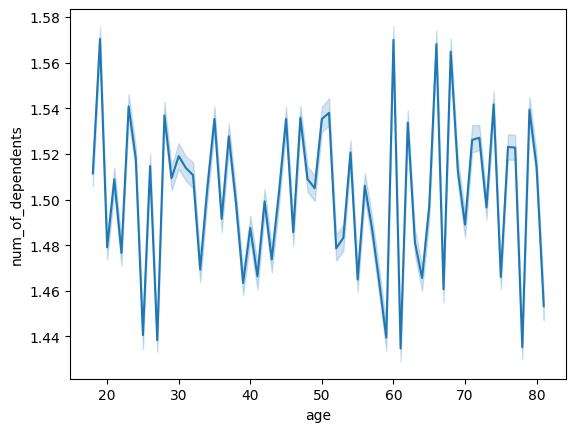

In [20]:
# creating line chart with the small sample new dataframe with the columns
line_demographics = sns.lineplot(data = small_age_dependents, x = 'age', y = 'num_of_dependents')

In [21]:
small_age_dependents['num_of_dependents'].mean()

np.float64(1.501987429815027)

### Visually, the average of kids is 1,5 across ages, confirmed by the script to find the average of the column. But even per age, the average is fluctuating between 1.4 and 1.6 which shows. There is not a real trend, so there is not strong relationship between these variables

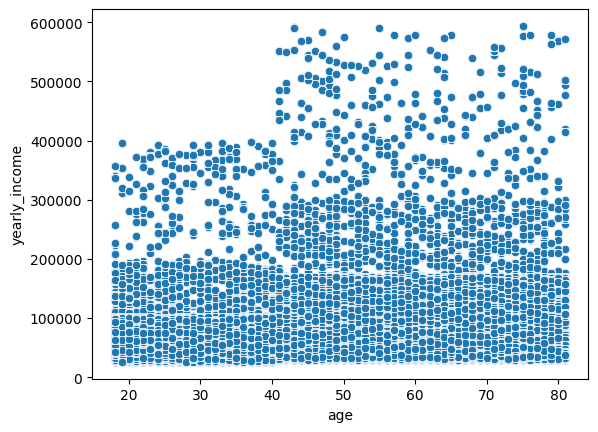

In [22]:
# step 7 - creating scatterplot between age and income
scatter = sns.scatterplot(x = 'age', y = 'yearly_income',data = ords_prods_all)

### There is not a strong correlation as we have dots spread in most area but there is some logic. However we can see that younger people have lower income (empty space above 40k from 20-40yo and fewer dots in a middle income are of 20k-40k). From 40yo, then the income starts to increase. We can see also that most of the customers have low income (20k or less), as we can see with all the dots at the bottom of the income axis. 

# 04. Exporting items

In [23]:
# export ords_prods_all to pickle (because I corrected one column name)
ords_prods_all.to_pickle('orders_products_all.pkl')

In [24]:
# Export hist setp 3
hist.figure.savefig('histogram_hour_of_day.png')

In [25]:
# Export bar_loyalty step 4
bar_loyalty.figure.savefig('bar_loyalty_flag.png')

In [26]:
# Export line_prices step 5 
line_prices.figure.savefig('line_prices.png')

In [27]:
# Export line_demographics step 6
line_demographics.figure.savefig('line_age_dependents.png')

In [28]:
# Export scatter step 7
scatter.figure.savefig('scatter_income_age.png')